In [2]:
# Basic libraries for data handling
import pandas as pd         # dataset handling
import numpy as np          # numerical operations

# for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# for balancing the imbalance class
from imblearn.over_sampling import SMOTE


In [3]:
# Load the dataset
df = pd.read_csv('bank-additional-full.csv')

In [4]:
# check number of rows and columns
df.shape

(41188, 21)

In [5]:
# Show first 5 rows
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Check column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
df.rename(columns={
    "age": "customer_age",
    "job": "job_type",
    "marital": "marital_status",
    "education": "education_level",
    "default": "credit_default",
    "housing": "has_housing_loan",
    "loan": "has_personal_loan",
    "contact": "contact_type",
    "month": "last_contact_month",
    "day_of_week": "last_contact_day",
    "duration": "call_duration_sec",
    "campaign": "campaign_contacts",
    "pdays": "days_since_last_contact",
    "previous": "previous_contacts",
    "poutcome": "previous_campaign_outcome",
    "emp.var.rate": "employment_variation_rate",
    "cons.price.idx": "consumer_price_index",
    "cons.conf.idx": "consumer_confidence_index",
    "euribor3m": "euribor_3m_rate",
    "nr.employed": "number_of_employees",
    "y": "subscription"
}, inplace=True)

In [8]:
# Check column names
df.columns

Index(['customer_age', 'job_type', 'marital_status', 'education_level',
       'credit_default', 'has_housing_loan', 'has_personal_loan',
       'contact_type', 'last_contact_month', 'last_contact_day',
       'call_duration_sec', 'campaign_contacts', 'days_since_last_contact',
       'previous_contacts', 'previous_campaign_outcome',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euribor_3m_rate', 'number_of_employees',
       'subscription'],
      dtype='object')

In [9]:
# Check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_age               41188 non-null  int64  
 1   job_type                   41188 non-null  object 
 2   marital_status             41188 non-null  object 
 3   education_level            41188 non-null  object 
 4   credit_default             41188 non-null  object 
 5   has_housing_loan           41188 non-null  object 
 6   has_personal_loan          41188 non-null  object 
 7   contact_type               41188 non-null  object 
 8   last_contact_month         41188 non-null  object 
 9   last_contact_day           41188 non-null  object 
 10  call_duration_sec          41188 non-null  int64  
 11  campaign_contacts          41188 non-null  int64  
 12  days_since_last_contact    41188 non-null  int64  
 13  previous_contacts          41188 non-null  int

In [10]:
# Statistical summary of numerical columns
df.describe()

,customer_age,call_duration_sec,campaign_contacts,days_since_last_contact,previous_contacts,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3m_rate,number_of_employees
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


OBSERVATION
* Identify numeric and categorical columns

* Check if datatype conversion needed

In [ ]:
# Check Unique Values
df.nunique().to_frame("Unique Values")

,Unique Values
age,78
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5


In [ ]:
# Check Null Values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

* no missing values found

In [ ]:
# Check Duplicate Values
df.duplicated().sum()

np.int64(12)

In [ ]:
# if duplicate value present drop this row
df = df.drop_duplicates()

In [ ]:
# Handle Missing / Unknown Values
df.replace("unknown", np.nan, inplace=True)
df.isnull().sum()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [ ]:
# filling the missing values
df.fillna(df.mode().iloc[0], inplace=True)

In [ ]:
# Drop Unnecessary Columns
df.drop(['duration'], axis=1, inplace=True)
# because we don't need duration in Predict whether client subscribes to term deposit

In [ ]:
# Check data type
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
# Separate Numerical & Categorical Variables
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [ ]:
num_cols

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

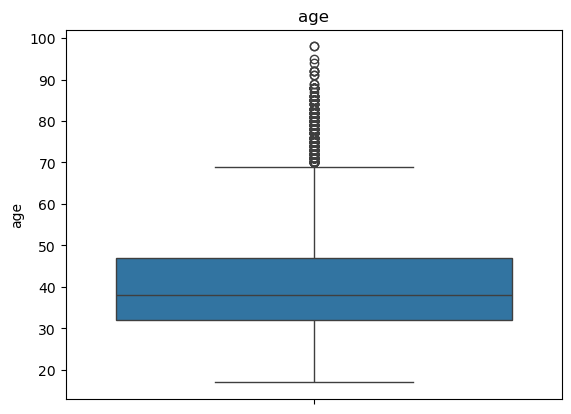

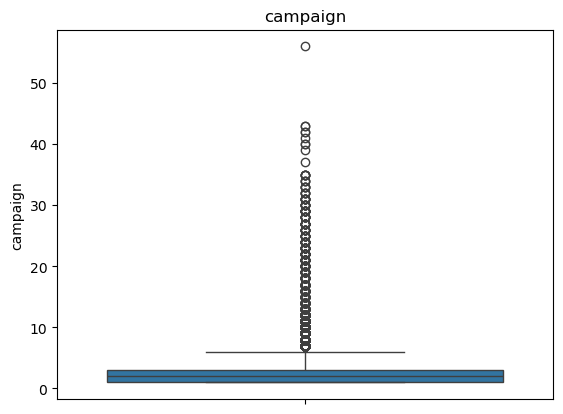

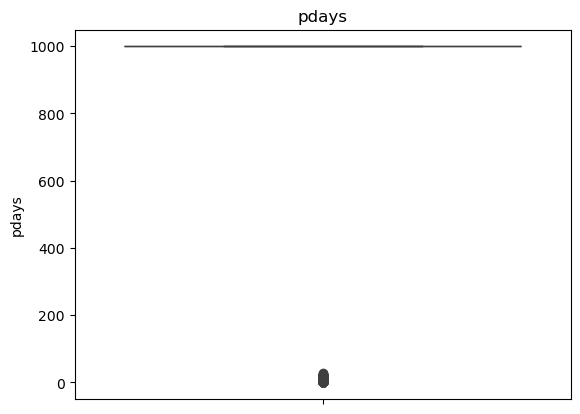

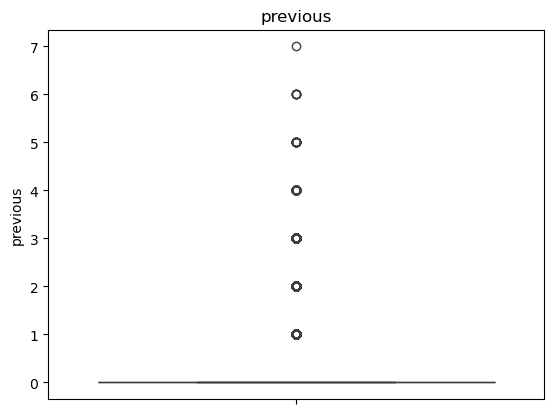

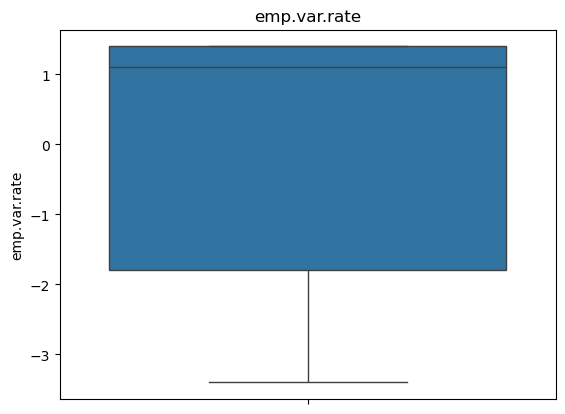

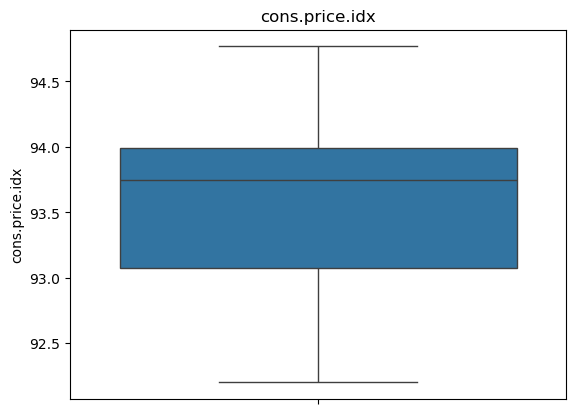

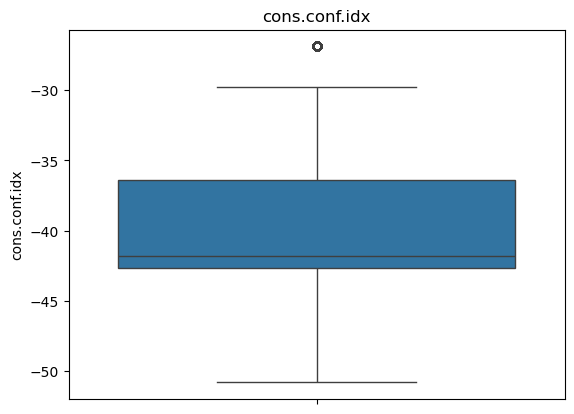

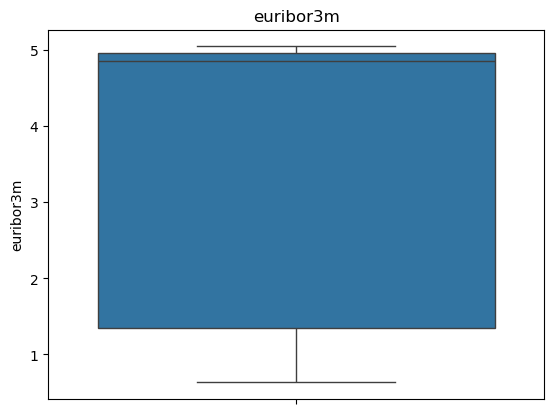

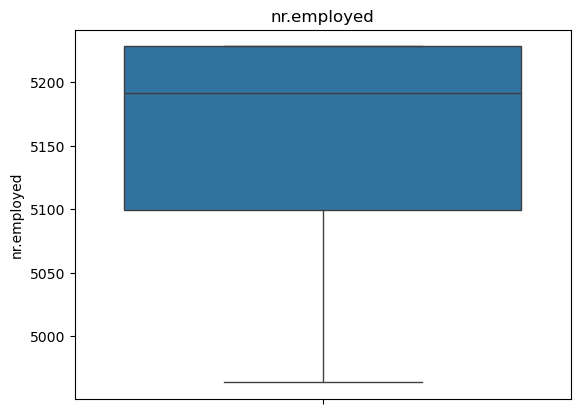

In [ ]:
# Check Outliers
for col in num_cols:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [ ]:
# Remove Outliers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

In [ ]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [ ]:
df = df[(df[col] >= lower) & (df[col] <= upper)]

* Extreme values removed

* Dataset size reduces

In [ ]:
# Check Skewness
df[num_cols].skew()

age               0.784560
campaign          4.762044
pdays            -4.921386
previous          3.831396
emp.var.rate     -0.724061
cons.price.idx   -0.230853
cons.conf.idx     0.302876
euribor3m        -0.709194
nr.employed      -1.044317
dtype: float64

In [ ]:
# Remove skewness
for col in num_cols:
    df[col] = np.log1p(df[col])

c:\Users\sahun\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Recheck skewness
df[num_cols].skew()

age               0.141276
campaign          1.350265
pdays            -5.005207
previous          2.586511
emp.var.rate     -2.021241
cons.price.idx   -0.241135
cons.conf.idx          NaN
euribor3m        -0.790738
nr.employed      -1.063718
dtype: float64

In [ ]:
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Separate features & target
X = df.drop('y_yes', axis=1)
y = df['y_yes']

In [ ]:
# Check class imbalance
y.value_counts()

y_yes
False    36537
True      4639
Name: count, dtype: int64

In [ ]:
# Check class imbalance
y.value_counts(normalize=True) * 100

y_yes
False    88.733728
True     11.266272
Name: proportion, dtype: float64

In [ ]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# Check class imbalance
y_train.value_counts(normalize=True)*100

y_yes
False    50.0
True     50.0
Name: proportion, dtype: float64

In [ ]:
# Feature Scaling (Only Numeric Columns)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* Makes features same scale

* Important for Logistic Regression, KNN, SVM

In [ ]:
# Apply SMOTE (only on training data)
sm = SMOTE(random_state=42)

X_train, y_train = sm.fit_resample(X_train, y_train)

print("After Balancing:")
print(pd.Series(y_train).value_counts())

After Balancing:
y_yes
False    29229
True     29229
Name: count, dtype: int64


What happens here?

* SMOTE creates synthetic minority samples to balance classes.

# Model Building

Logistic Regression